In [52]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import requests
from bs4 import BeautifulSoup

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# code for sydney
dates = [] # empty list for now, will have dates of 
for x in dates:
    page = requests.get(f'https://darksky.net/details/-33.8686,151.2094/{x}/us12/en') # 1999-5-4
    soup = BeautifulSoup(page.content, 'html.parser')
    df['Something'] = soup.find(class_=highTemp swip)

In [2]:
df = pd.read_csv('ausraindata.csv')
df = df.rename({'MinTemp':'TempLow', 'MaxTemp':'TempHigh'}, axis=1)
df = df.drop('RISK_MM', axis=1)
df.shape

(142193, 23)

In [6]:
df.isna().sum()

Date                 0
Location             0
TempLow            637
TempHigh           322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [7]:
# Feature to turn yes and no values into 1 and 0 values
def trans_bools(df, col):
    df[col] = np.where(df[col]=='Yes', 1, 0)
    return df

In [8]:
# Function to apply all features to data
def apply_features(df):
    for col in ['RainToday', 'RainTomorrow']:
        df = trans_bools(df, col)
    return df

df = apply_features(df)

In [9]:
df.head()

,Date,Location,TempLow,TempHigh,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [10]:
# Fill categorical NA values with the value from previous day
df['WindGustDir'].fillna(method = 'bfill', inplace=True)
df['WindDir9am'].fillna(method = 'bfill', inplace=True)
df['WindDir3pm'].fillna(method = 'bfill', inplace=True)
df['RainToday'].fillna(method = 'bfill', inplace=True)

In [11]:
df.head()

,Date,Location,TempLow,TempHigh,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [14]:
df.Evaporation.isna().sum()

60843

In [15]:
df.shape

(142193, 23)

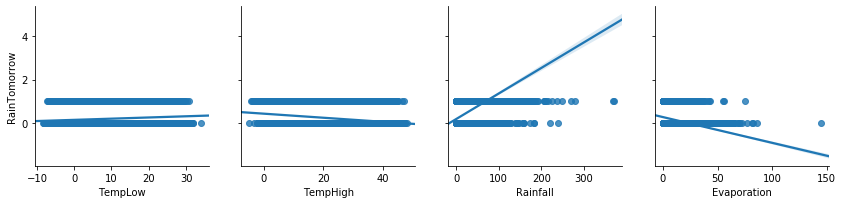

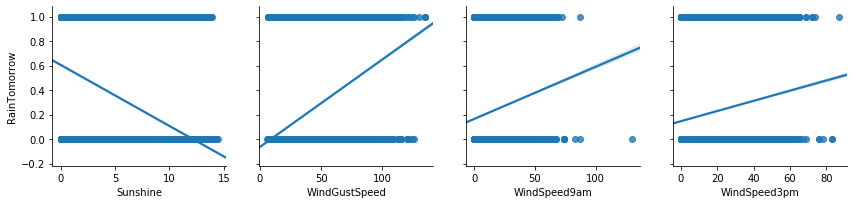

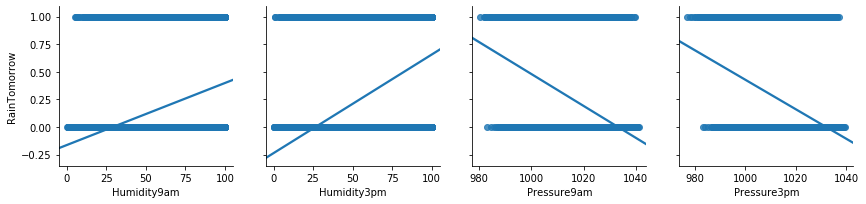

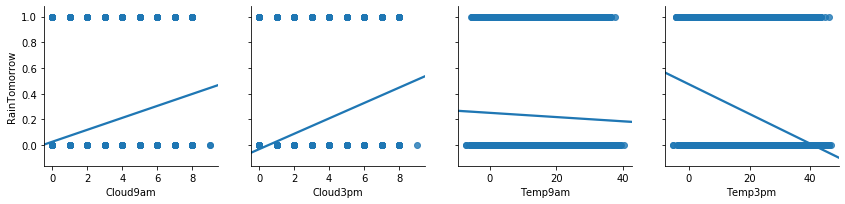

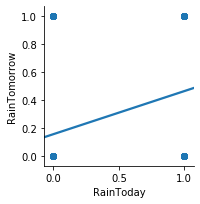

In [20]:
# Function to plot each feature vs target variable
def pplot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, x_vars=row, y_vars='RainTomorrow', kind='reg', height=3)
    return plt.show()

features = df.drop(['RainTomorrow', 'Date', 'Location', 'WindGustDir',
                    'WindDir9am', 'WindDir3pm'], axis=1).keys()

pplot_features(df, features)

In [26]:
df.WindGustDir.value_counts()

SSE    13077
SSW    11714
W       9903
SE      9434
E       9221
SW      9172
N       9119
S       9041
WSW     9007
NW      8267
WNW     8191
ENE     8099
ESE     7622
NE      7152
NNW     6623
NNE     6551
Name: WindGustDir, dtype: int64

In [37]:
# attempt at setting up np.select to simplify wind directions
coords_conditions = [['SSE', 'ESE'], ['SSW', 'WSW'], ['WNW', 'NNW'], ['ENE', 'NNE']]

coords_choices = ['SE', 'SW', 'NW', 'NE']

df['WindGustDir'] = np.select(if coords_conditions in df['WindGustDir'], coords_choices, df['WindGustDir'])
df['WindDir9am'] = np.select(coords_conditions, coords_choices, df['WindDir9am'])
df['WindDir3pm'] = np.select(coords_conditions, coords_choices, df['WindDir3pm'])

SyntaxError: invalid syntax (<ipython-input-37-b0233a9b3935>, line 5)

In [34]:
df.Rainfall.isna().sum()

1406

In [35]:
df.RainTomorrow.isna().sum()

0

In [41]:
df.columns

Index(['Date', 'Location', 'TempLow', 'TempHigh', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [47]:
# attempt at setting up ols to view relationship between features and target
everything_ols = ols(formula='RainTomorrow~TempLow+TempHigh+Rainfall+Evaporation+Sunshine+WindGustDir+WindGustSpeed+WindDir9am+WindDir3pm+WindSpeed9am+WindSpeed3pm+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp9am+Temp3pm',
              data=df).fit()
everything_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     547.1
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        14:08:44   Log-Likelihood:                -17953.
No. Observations:               58090   AIC:                         3.603e+04
Df Residuals:                   58028   BIC:                         3.659e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.3875      0.288     29.140      0.000       7.823       8.952
WindGustDir[T.ENE]    -0.0105      0.007     -1.435      0.151      -0.025       0.004
WindGustDir[T.ESE]     0.0197      0.008      2.572      0.010       0.005       0.035
WindGustDir[T.N]      -0.0310      0.008     -3.677      0.000      -0.048      -0.014
WindGustDir[T.NE]     -0.0062      0.008     -0.761      0.447      -0.022       0.010
WindGustDir[T.NNE]    -0.0095      0.009     -1.053      0.292      -0.027       0.008
WindGustDir[T.NNW]    -0.0087      0.010     -0.911      0.362      -0.027       0.010
WindGustDir[T.NW]      0.0006      0.009      0.068      0.946      -0.018       0.019
WindGustDir[T.S]       0.0204      0.008      2.466      0.014       0.004       0.037
WindGustDir[T.SE]      0.0273      0.008      3.535      0.000       0.012       0.042
WindGustDir[T.SSE]     0.0331      0.008      3.998      0.000       0.017       0.049
WindGustDir[T.SSW]     0.0200      0.008      2.439      0.015       0.004       0.036
WindGustDir[T.SW]      0.0178      0.008      2.163      0.031       0.002       0.034
WindGustDir[T.W]       0.0090      0.008      1.069      0.285      -0.008       0.026
WindGustDir[T.WNW]     0.0109      0.009      1.204      0.228      -0.007       0.029
WindGustDir[T.WSW]     0.0194      0.008      2.297      0.022       0.003       0.036
WindDir9am[T.ENE]      0.0164      0.007      2.291      0.022       0.002       0.030
WindDir9am[T.ESE]     -0.0156      0.007     -2.079      0.038      -0.030      -0.001
WindDir9am[T.N]       -0.0015      0.007     -0.204      0.838      -0.016       0.013
WindDir9am[T.NE]       0.0208      0.008      2.723      0.006       0.006       0.036
WindDir9am[T.NNE]      0.0328      0.008      4.168      0.000       0.017       0.048
WindDir9am[T.NNW]     -0.0280      0.008     -3.397      0.001      -0.044      -0.012
WindDir9am[T.NW]      -0.0227      0.008     -2.734      0.006      -0.039      -0.006
WindDir9am[T.S]       -0.0323      0.008     -4.127      0.000      -0.048      -0.017
WindDir9am[T.SE]      -0.0304      0.007     -4.111      0.000      -0.045      -0.016
WindDir9am[T.SSE]     -0.0285      0.008     -3.787      0.000      -0.043      -0.014
WindDir9am[T.SSW]     -0.0250      0.008     -3.048      0.002      -0.041      -0.009
WindDir9am[T.SW]      -0.0005      0.008     -0.062      0.951      -0.016       0.015
WindDir9am[T.W]       -0.0020      0.008     -0.253      0.800      -0.017       0.013
WindDir9am[T.WNW]     -0.0172      0.008     -2.080      0.038      -0.033      -0.001
WindDir9am[T.WSW]      0.0002      0.008      0.026      0.979      -0.016       0.016
WindDir3pm[T.ENE]     -0.0103      0.008     -1.339      0.181      -0.025       0.005
WindDir3pm[T.ESE]      0.0060      0.0

In [48]:
df.Date.min()

'2007-11-01'

In [49]:
df.Date.max()

'2017-06-25'

In [50]:
df.Pressure3pm.

0         1007.1
1         1007.8
2         1008.7
3         1012.8
4         1006.0
           ...  
142188    1021.2
142189    1020.3
142190    1019.1
142191    1016.8
142192    1016.5
Name: Pressure3pm, Length: 142193, dtype: float64

In [55]:
df.columns

Index(['Date', 'Location', 'TempLow', 'TempHigh', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [72]:
# set up a list of df of each town
idek = []
for location, df_location in df.groupby('Location'):
    idek.append(df_location)

In [88]:
df.Location

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
142188     Uluru
142189     Uluru
142190     Uluru
142191     Uluru
142192     Uluru
Name: Location, Length: 142193, dtype: object

In [87]:
idek

[             Date  Location  TempLow  TempHigh  Rainfall  Evaporation  \
 93856  2008-07-01  Adelaide      8.8      15.7       5.0          1.6   
 93857  2008-07-02  Adelaide     12.7      15.8       0.8          1.4   
 93858  2008-07-03  Adelaide      6.2      15.1       0.0          1.8   
 93859  2008-07-04  Adelaide      5.3      15.9       0.0          1.4   
 93860  2008-07-06  Adelaide     11.3      15.7       NaN          NaN   
 ...           ...       ...      ...       ...       ...          ...   
 96941  2017-06-20  Adelaide      4.9      19.1       0.0          NaN   
 96942  2017-06-21  Adelaide      4.5      19.2       0.0          NaN   
 96943  2017-06-22  Adelaide      4.6      19.5       0.0          NaN   
 96944  2017-06-23  Adelaide      5.4      18.5       0.0          NaN   
 96945  2017-06-24  Adelaide      5.0      17.3       0.0          NaN   
 
        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
 93856       2.6          NW       

In [79]:
# list of town names
town_names = []
for x in df.Location.unique():
    town_names.append(x)

In [91]:
# alphabetized list
town_names = sorted(town_names)

In [92]:
town_names

['Adelaide',
 'Albany',
 'Albury',
 'AliceSprings',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Brisbane',
 'Cairns',
 'Canberra',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Darwin',
 'GoldCoast',
 'Hobart',
 'Katherine',
 'Launceston',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'MountGambier',
 'MountGinini',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Nuriootpa',
 'PearceRAAF',
 'Penrith',
 'Perth',
 'PerthAirport',
 'Portland',
 'Richmond',
 'Sale',
 'SalmonGums',
 'Sydney',
 'SydneyAirport',
 'Townsville',
 'Tuggeranong',
 'Uluru',
 'WaggaWagga',
 'Walpole',
 'Watsonia',
 'Williamtown',
 'Witchcliffe',
 'Wollongong',
 'Woomera']

In [93]:
# dict where value is df of the town in the key
df_per_town = dict(zip(town_names, idek))

In [95]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 928 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 2.1 MB/s eta 0:00:01


In [98]:
import geopandas
import geopy

In [175]:
# for loop to create list of lat/long in same order as town_names list
lat_lon = []
locator = geopy.geocoders.Nominatim(user_agent='myGeoder')
for town in town_names:
    location = locator.geocode(str(town)+', Australia')
    lat_lon.append((location.latitude, location.longitude))

In [180]:
len(lat_lon)

49